In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
#%matplotlib inline

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('heart.csv')
print(df.head())
sns.countplot(df['target'])
plt.title('Value counts of heart disease patients')
plt.show()
df.describe().T
df.head(1000)

FileNotFoundError: ignored

In [ ]:
X = df.drop(['target'], axis=1)

y = df['target']

In [ ]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_train.shape, X_test.shape

((717, 13), (308, 13))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)
# checking the oob score
classifier_rf.oob_score_

0.899581589958159

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
#%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best

0.9037554314090627


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

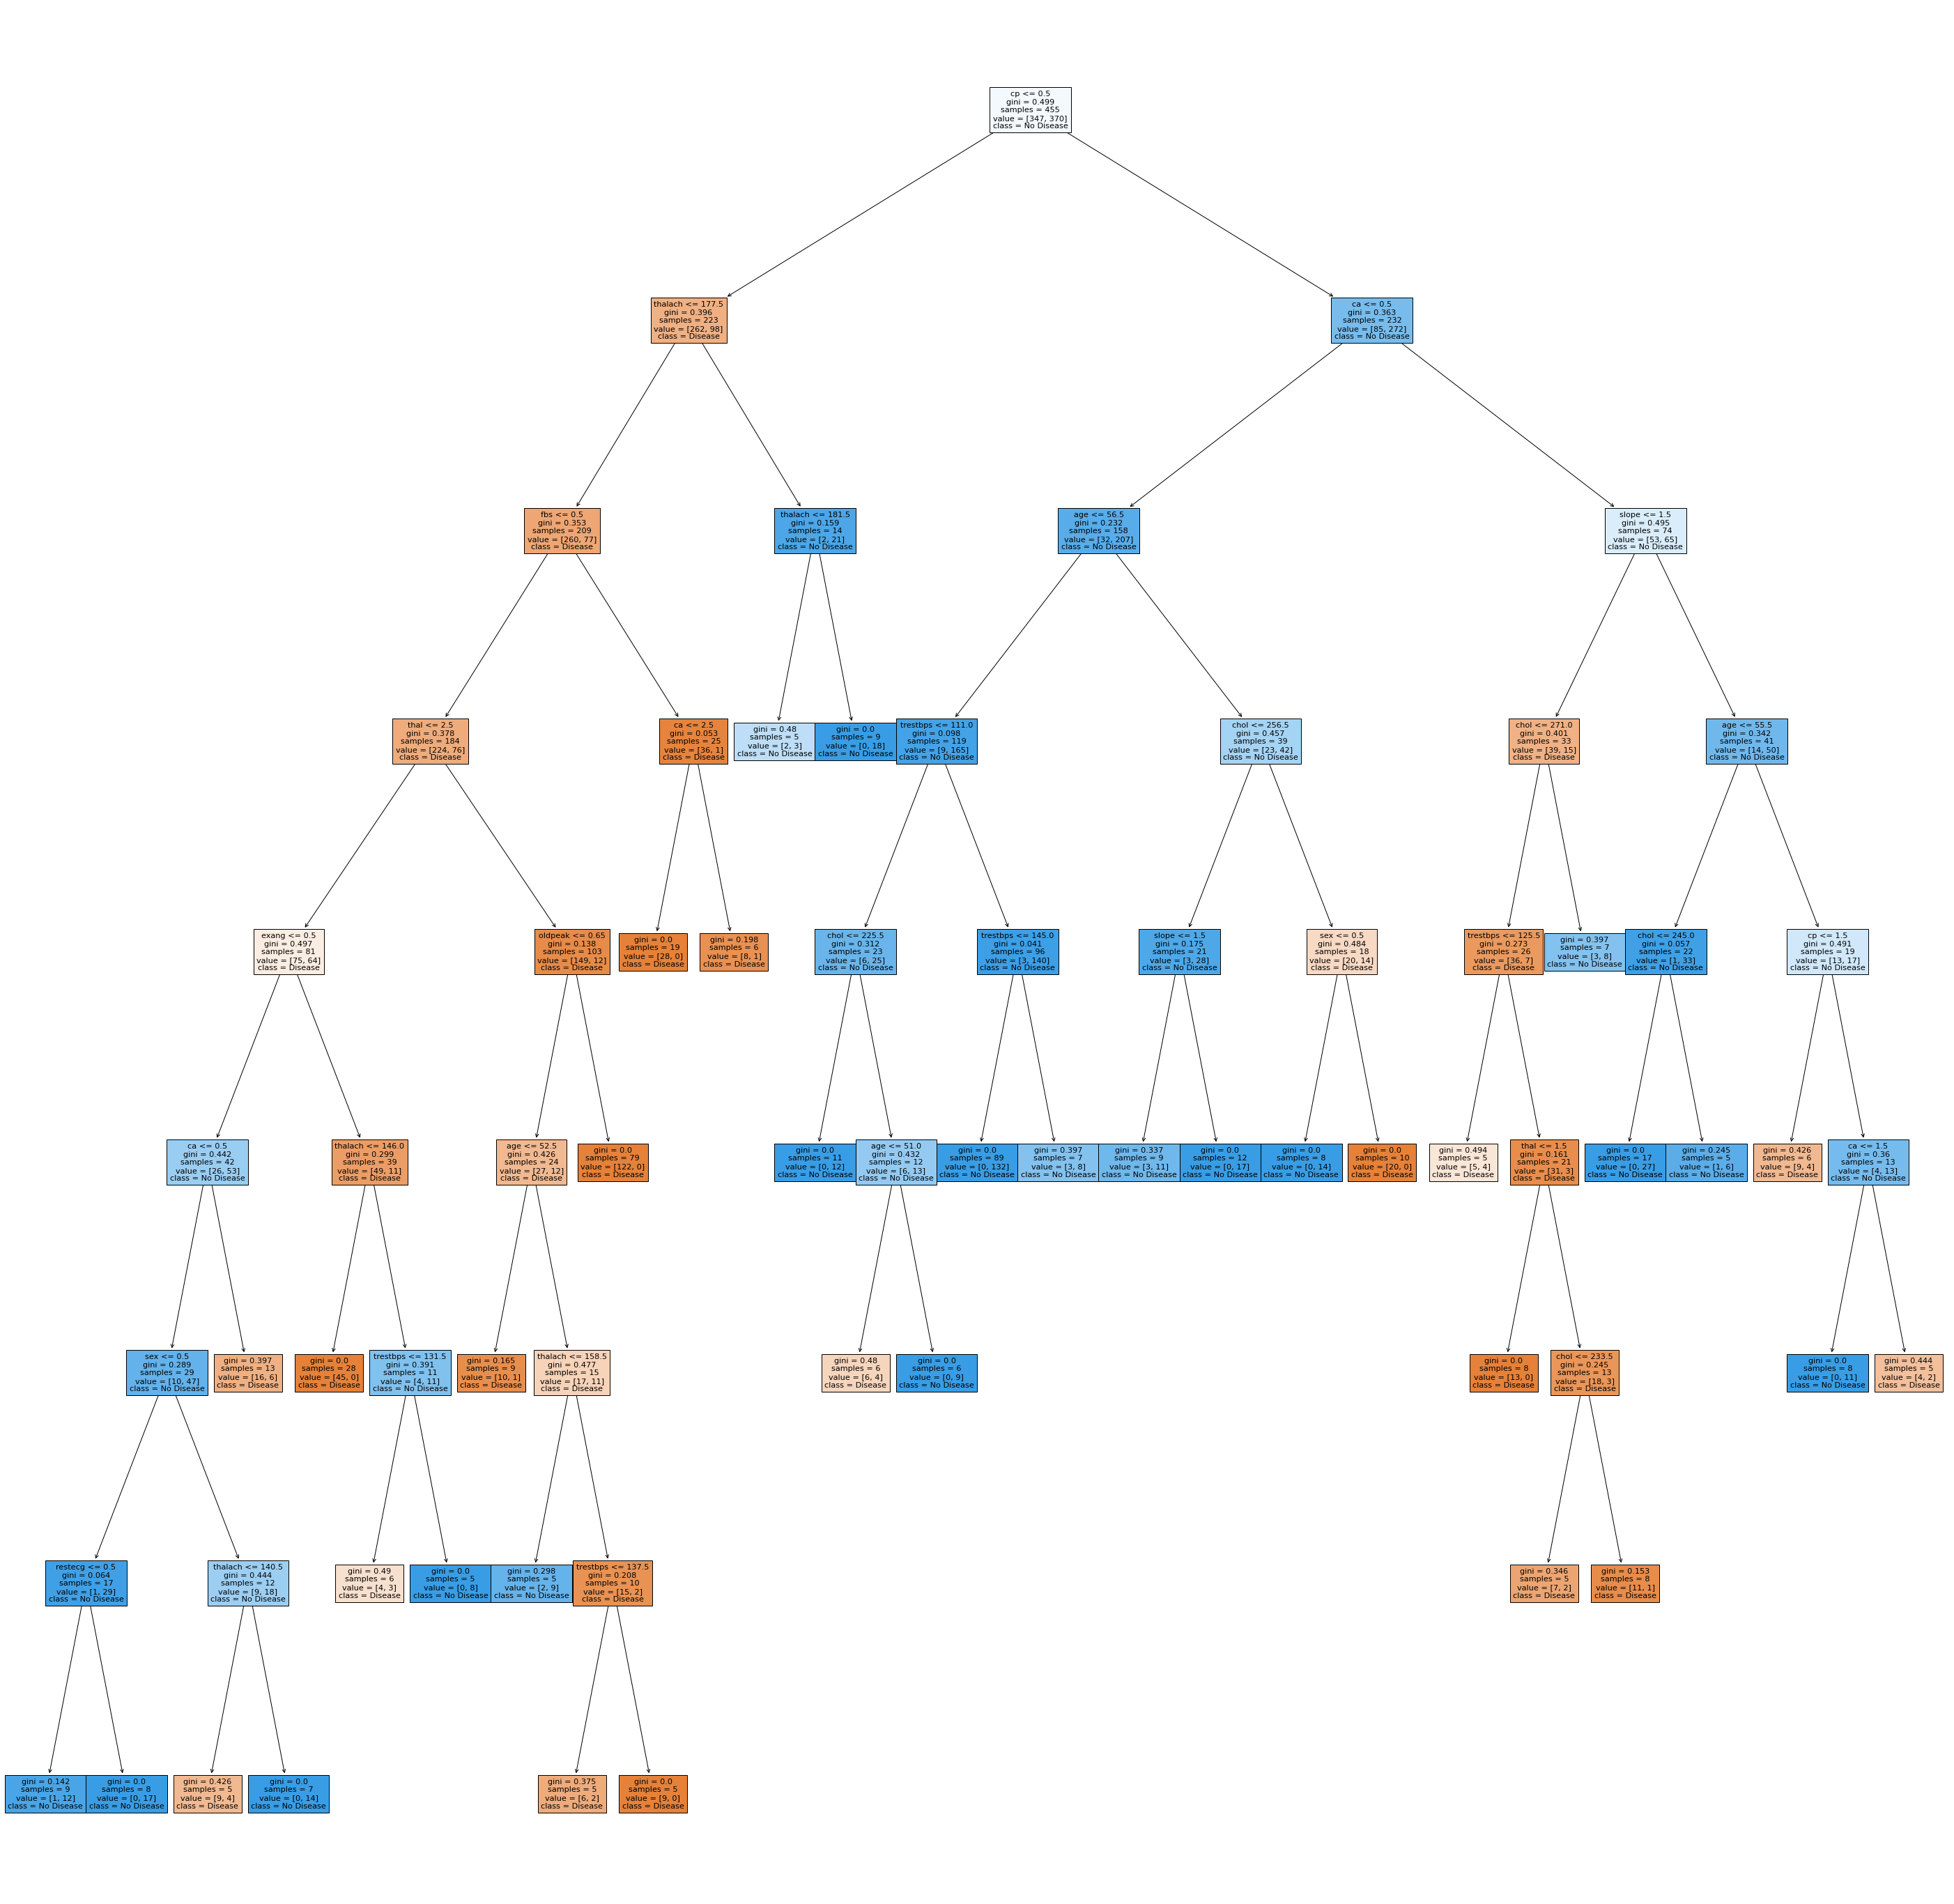

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [ ]:
rf_best.feature_importances_

array([0.08553968, 0.0289716 , 0.13727566, 0.05128179, 0.05573205,
       0.00430331, 0.01707097, 0.11088134, 0.08077427, 0.12044965,
       0.05308421, 0.1329045 , 0.12173098])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
2,cp,0.137276
11,ca,0.132905
12,thal,0.121731
9,oldpeak,0.120450
7,thalach,0.110881
0,age,0.085540
8,exang,0.080774
4,chol,0.055732
10,slope,0.053084
3,trestbps,0.051282
